In [1]:
import os
import matplotlib.pyplot as plt #to enable plotting within notebook
from nilearn import image as img
from nilearn import plotting as plot
from bids.layout import BIDSLayout
import numpy as np
%matplotlib inline

In [12]:
#pull files for 1 subject
fmriprep_dir = '/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/derivatives/fmriprep/'
layout = BIDSLayout(fmriprep_dir, validate=False)
T1w_files = layout.get(subject='mfcc003', datatype='anat', suffix='T1w',extension='.nii.gz',space='MNI152NLin2009cAsym')
brainmask_files = layout.get(subject='mfcc003', datatype='anat',suffix='mask',extension='.nii.gz',space='MNI152NLin2009cAsym')
func_files = layout.get(subject='mfcc003', datatype='func', task='n1', suffix='bold',extension='.nii.gz',space='MNI152NLin2009cAsym')
func_mask_files = layout.get(subject='mfcc003', datatype='func', task='n1', suffix='mask',extension='.nii.gz',space='MNI152NLin2009cAsym')

In [13]:
func_mni = func_files[0].path
func_mni_img = img.load_img(func_mni)

In [18]:
#shape of data
func_mni_img.shape

(49, 58, 49, 147)

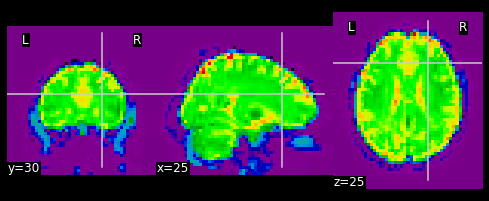

In [20]:
#pull out 5th TR and plot
x_slice = func_mni_img.slicer[:,:,:,4:5]
plot.plot_epi(x_slice, cut_coords=(25,30,25))


In [23]:
#extract time series of single voxel
single_vox = func_mni_img.slicer[25:26,45:46,30:31,:].get_data()
single_vox.shape

/Users/alexjinich1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


(1, 1, 1, 147)

In [24]:
#flatten to 1D (time)
single_vox = single_vox.flatten()
single_vox.shape

(147,)

Text(0, 0.5, 'Signal value')

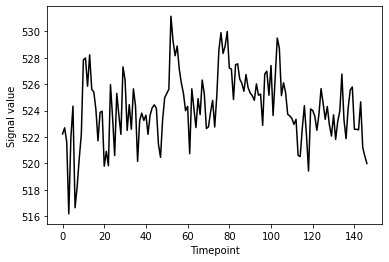

In [25]:
#make x-axis
x_axis = np.arange(0, single_vox.shape[0])

#plot (k = black line)
plt.plot (x_axis, single_vox, 'k')

#label axes
plt.xlabel('Timepoint')
plt.ylabel('Signal value')

In [26]:
# Resampling anat down to func

In [28]:
T1_mni = T1w_files[0].path
T1_mni_img = img.load_img(T1_mni)  #anat

In [30]:
# size of anat and func imgs
print(T1_mni_img.shape)
print(func_mni_img.shape)

(193, 229, 193)
(49, 58, 49, 147)


In [33]:
# img.resample_to_img(source_img,target_img,interpolation)

  # source_img = the image you want to sample
  # target_img = the image you wish to resample to
  # interpolation = the method of interpolation (continuous, keep edges for struc; linear, will blur; nearest, matches nearest voxel, for masks)

(49, 58, 49)
(49, 58, 49, 147)


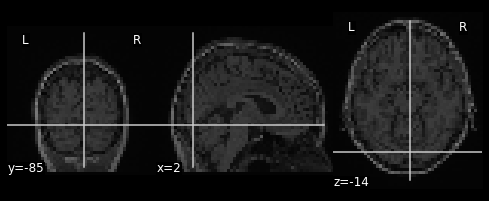

In [32]:
resamp_t1 = img.resample_to_img(source_img=T1_mni_img, target_img=func_mni_img, interpolation='continuous')
print(resamp_t1.shape)
print(func_mni_img.shape)
plot.plot_anat(resamp_t1)